# The <code class="side-menu-class-name">RunnerFitResults</code> class

_Run this notebook directly in your browser through Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/runner-suite%2Frunnerase-usage-environment/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgitlab.com%252Frunner-suite%252Frunnerase-usage%26urlpath%3Dtree%252Frunnerase-usage%252Fstorage_fitresults.ipynb%26branch%3Dmain)_

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from runnerase.calculators.runner import Runner
from ase.io import read
from runnerase import generate_symmetryfunctions

`RunnerFitResults` is a storageclass for calculation results that are typically generated during Mode 2. It stores the training results for every epoch.
Let us run a quick modes 1 and 2 of a calculation to have some results to inspect:

In [2]:
RUNNER_CMD = 'runner1 > PREFIX.out'

calc = Runner(
    command=RUNNER_CMD,
    dataset=read('data/input.data', index=':', format='runnerdata'),
    label='mode1/mode1'
)

calc.symmetryfunctions += generate_symmetryfunctions(calc.dataset, sftype=2,
                                                     algorithm='turn', cutoff=12.0)

calc.run(mode=1)

calc = Runner(restart='mode1/mode1', label='mode2/mode2', command=RUNNER_CMD)
calc.set(epochs=10)
calc.set(short_force_fraction=0.01)
calc.run(mode=2)

Mode 1: No. Structures:   0%|          | 0/100 [00:00<?, ?it/s]

Mode 2: No. Epochs: 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


As you can see, `calc.results` now contains the `fitresults` key.

In [3]:
calc.results

{'sfvalues': RunnerSymmetryFunctionValues(n_structures=100),
 'splittraintest': RunnerSplitTrainTest(n_train=89, n_test=11),
 'fitresults': RunnerFitResults(num_epochs=11, best epoch=10),
 'weights': RunnerWeights(H: 451, O: 451),
 'scaling': RunnerScaling(elements=['1', '2'], min=-25.5225552067, max=-25.5211676542)}

## Class Properties

The `RunnerFitResults` class has several interesting properties:
* `epochs` stores a list of the epochs.
* `rmse_energy`/`rmse_forces` stores the train/test set RMSEs for the energy and forces, respectively.
* `opt_rmse_epoch_runner`/`opt_rmse_runnerase` stores the value of the epoch that RuNNer and runnerase labeled the best one.
* `units` contains a dictionary of the units in the output of RuNNer.

These properties are used when we inspect the `table` after a calculation:

In [4]:
fitresults = calc.results['fitresults']
fitresults.table()

Epoch | RMSE(E) / eV/atom  | RMSE(F) / eV/Bohr  |
      |  Train   |  Test   |  Train   |  Test   |
-------------------------------------------------
    0 |  0.0095  |  0.0085 |  0.4059  |  0.4094 |
    1 |  0.0073  |  0.0064 |  0.4152  |  0.4180 |
    2 |  0.0063  |  0.0055 |  0.3857  |  0.3877 | <- Best Epoch according to RuNNer
    3 |  0.0084  |  0.0094 |  0.3433  |  0.3460 |
    4 |  0.0087  |  0.0100 |  0.3376  |  0.3404 |
    5 |  0.0057  |  0.0065 |  0.3275  |  0.3309 |
    6 |  0.0056  |  0.0078 |  0.2976  |  0.3022 |
    7 |  0.0059  |  0.0073 |  0.2763  |  0.2824 |
    8 |  0.0058  |  0.0076 |  0.2508  |  0.2593 |
    9 |  0.0095  |  0.0101 |  0.2516  |  0.2603 |
   10 |  0.0043  |  0.0069 |  0.2465  |  0.2555 | <- Best Epoch according to runnerase


runnerase tries to make a guess at which epoch is the best one. If forces were trained, it chooses the epoch with the lowest force RMSE. Otherwise, it uses the one with the lowest energy RMSE.

The weights which runnerase determines to best the best ones are read as results and used for mode 3.

## Plotting

The `plot` interface of the class makes it easy to track to progress of the calculation:

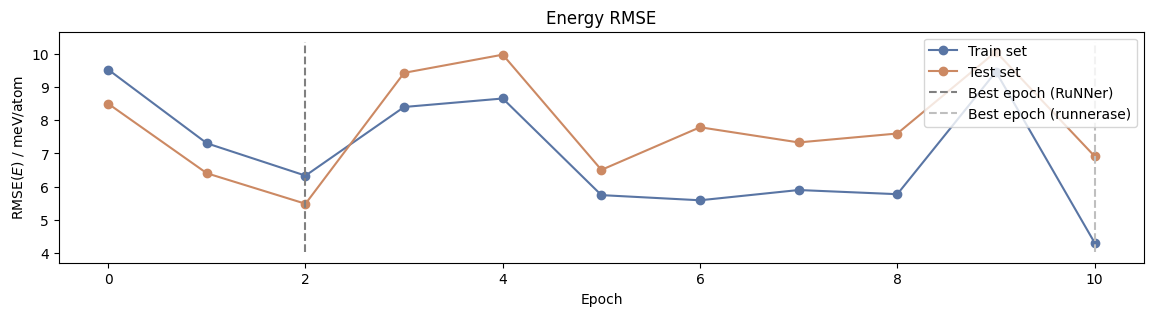

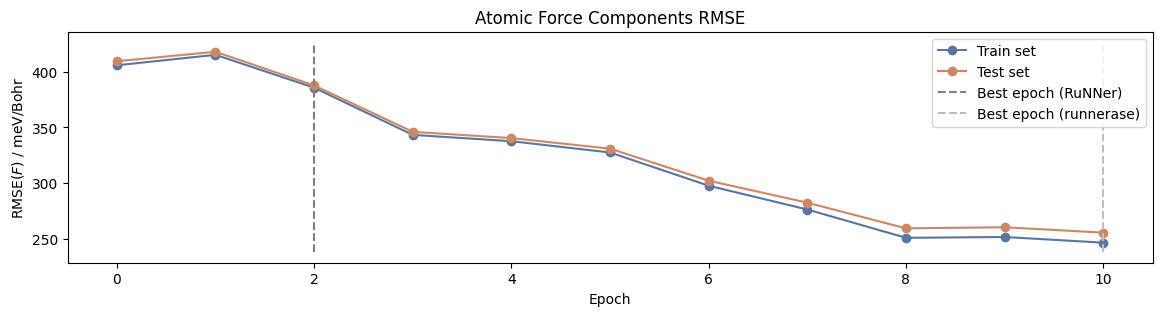

In [9]:
fig, ax = plt.subplots(figsize=(14, 3))
axes = fitresults.plot.rmse_e()
plt.show()

fig, ax = plt.subplots(figsize=(14, 3))
axes = fitresults.plot.rmse_f()
plt.show()